In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# Introduction to graph theory

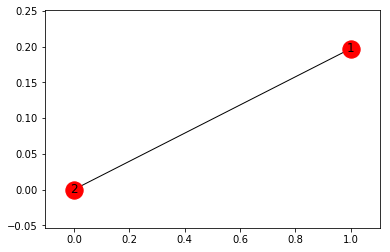

In [2]:
G = nx.Graph()
G.add_edge(1,2)
nx.draw_networkx(G)
plt.show()

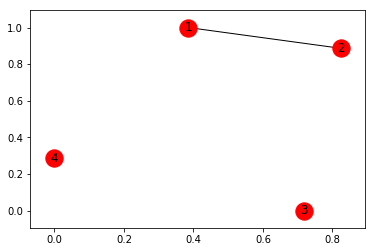

In [3]:
G.add_nodes_from([3, 4])
nx.draw_networkx(G)
plt.show()

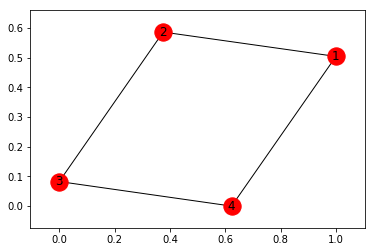

In [4]:
G.add_edge(3,4)
G.add_edges_from([(2, 3), (4, 1)])
nx.draw_networkx(G)
plt.show()

In [5]:
G.nodes()

[1, 2, 3, 4]

In [6]:
G.edges()

[(1, 2), (1, 4), (2, 3), (3, 4)]

In [7]:
G.adjacency_list()

[[2, 4], [1, 3], [4, 2], [3, 1]]

In [8]:
nx.to_dict_of_lists(G)

{1: [2, 4], 2: [1, 3], 3: [4, 2], 4: [3, 1]}

In [9]:
nx.to_edgelist(G)

[(1, 2, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})]

In [10]:
nx.to_numpy_matrix(G)

matrix([[ 0.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  0.]])

In [12]:
print (nx.to_scipy_sparse_matrix(G))

  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1


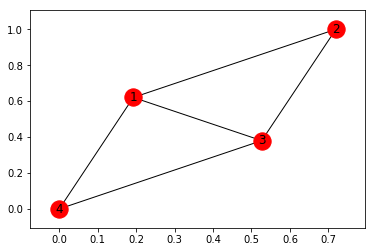

In [13]:
G.add_edge(1,3)
nx.draw_networkx(G)
plt.show()

In [14]:
G.degree()

{1: 3, 2: 2, 3: 3, 4: 2}

ValueError: x must be 1D or 2D

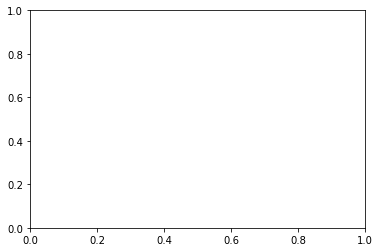

In [15]:
plt.hist(nx.fast_gnp_random_graph(10000, 0.01).degree().values())

# Graph algorithms

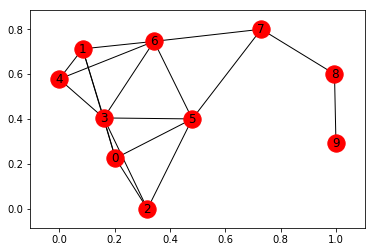

In [16]:
G = nx.krackhardt_kite_graph()
nx.draw_networkx(G)
plt.show()

In [17]:
print nx.has_path(G, source=1, target=9)
print nx.shortest_path(G, source=1, target=9)
print nx.shortest_path_length(G, source=1, target=9)

SyntaxError: invalid syntax (<ipython-input-17-326014e4ecb0>, line 1)

In [18]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [19]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

In [20]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

In [21]:
nx.eigenvector_centrality(G)

{0: 0.35220918419838565,
 1: 0.35220918419838565,
 2: 0.28583482369644964,
 3: 0.481020669200118,
 4: 0.28583482369644964,
 5: 0.3976909028137205,
 6: 0.3976909028137205,
 7: 0.19586101425312444,
 8: 0.04807425308073236,
 9: 0.011163556091491361}

In [22]:
nx.clustering(G)

{0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0.0,
 9: 0.0}

In [32]:
import community # Community module for community detection and clustering

G = nx.powerlaw_cluster_graph(100, 1, .4)
partition = community.best_partition(G)

for i in set(partition.values()):
   print ("Community", i)
   members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == i]
   print (members)

values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

print ("Modularity score:", community.modularity(partition, G))

SyntaxError: invalid syntax (community.py, line 512)

# Graph loading, dumping, and sampling

In [33]:
dump_file_base = "dumped_graph"

# Be sure the dump_file file doesn't exist
def remove_file(filename):
    import os
    if os.path.exists(filename):
        os.remove(filename)

In [34]:
G = nx.krackhardt_kite_graph()

In [35]:
# GML format write and read
GML_file = dump_file_base + '.gml'
remove_file(GML_file)

nx.write_gml(G, GML_file)
G2 = nx.read_gml(GML_file)

assert(G.edges() == G2.edges())

AssertionError: 

In [36]:
# The same can be done with
# JSON, Adjacency List, Edge List, GEXF, GraphML and so on

In [37]:
import snowball_sampling
my_social_network = nx.Graph()
snowball_sampling.snowball_sampling(my_social_network, 2, 'alberto')
nx.draw(my_social_network)
plt.show()

Reching depth 0
 new nodes to investigate: ['alberto']


ModuleNotFoundError: No module named 'urllib2'

In [38]:
my_sampled_social_network = nx.Graph()
snowball_sampling.snowball_sampling(my_sampled_social_network, 3, 'alberto', sampling_rate=0.2)
nx.draw(my_sampled_social_network)
plt.show()

Reching depth 0
 new nodes to investigate: ['alberto']


ModuleNotFoundError: No module named 'urllib2'